                                                Title  \
0                      Its Only Art If Its Well Hung!   
1                            Dr. Seuss: American Icon   
2               Wonderful Worship in Smaller Churches   
3                       Whispers of the Wicked Saints   
4   The Church of Christ: A Biblical Ecclesiology ...   
5                            Saint Hyacinth of Poland   
6   Rising Sons and Daughters: Life Among Japan's ...   
7   Muslim Women's Choices: Religious Belief and S...   
8                         Dramatica for Screenwriters   
9    Mensa Number Puzzles (Mensa Word Games for Kids)   
10  Vector Quantization and Signal Compression (Th...   
11                               A husband for Kutani   
12  The Ultimate Guide to Law School Admission: In...   
13  The Repeal of Reticence: A History of America'...   
14  Overcoming Hypertension (Dr. Kenneth H. Cooper...   
15                                   Alaska Sourdough   
16  The Oxford Handbook of Free

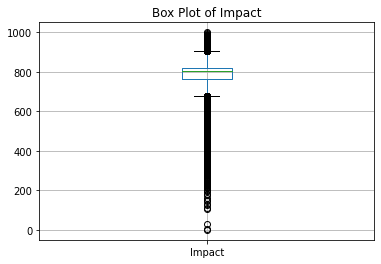

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error

from Deep_Learning_utils import *
# Load the data:
data = pd.read_csv("/data1/notebooks/H_Level/ML/Data/books_task.csv")

data = data.drop(['Unnamed: 0'], axis = 1)

#EDA:
data_overview = DataOverview(data)
data_overview.get_data_head()
data_overview.get_column_names()
data_overview.get_data_types()
data_overview.describe_numerical()
data_overview.describe_categorical()
data_overview.get_data_info()
data_overview.get_null_count()
data_overview.plot_box_plot_numerical(numerical_cols = ['Impact'])

# Pre Processing of Data: 
data_preprocessed = general_preprocessing(data)
data_preprocessed.removesquarebracket(columns = ['authors', 'categories'])
data_preprocessed.date_processing(columns = ['publishedDate'])
data_preprocessed.dropna()
data_preprocessed.scaled(columns_to_scale = ['Impact'])

# Initialize the TextPreprocessor
text_to_seq_padd_data = Preprocessing_text_to_seq_padd(data)

# Fit and transform the data
text_to_seq_padd_data = text_to_seq_padd_data.text_to_seq_padd(columns = ['Title', 
                                                                          'description', 
                                                                          'authors', 
                                                                          'publisher',
                                                                          'publishedDate',
                                                                          'categories'])

# Usage
input_features = InputFeatures(data, text_to_seq_padd_data)

X_title = input_features.X_title
X_description = input_features.X_description
X_author = input_features.X_author
X_publisher = input_features.X_publisher
X_categories = input_features.X_categories
X_year = input_features.X_year

X_train_title = input_features.X_train_title
X_train_description = input_features.X_train_description
X_train_author = input_features.X_train_author
X_train_publisher = input_features.X_train_publisher
X_train_categories = input_features.X_train_categories
X_train_year = input_features.X_train_year

X_test_title = input_features.X_test_title
X_test_description = input_features.X_test_description
X_test_author = input_features.X_test_author
X_test_publisher = input_features.X_test_publisher
X_test_categories = input_features.X_test_categories
X_test_year = input_features.X_test_year

y_train = input_features.y_train
y_test = input_features.y_test


In [3]:
# Instantiate DeepLearningModel class

dl_model = DeepLearningModel()
dl_model.build_model( X_title, X_description, X_author, X_publisher, X_categories, X_year, X_train_title, X_train_description, X_train_author, X_train_publisher, X_train_categories, X_train_year, X_test_title, X_test_description, X_test_author, X_test_publisher, X_test_categories, X_test_year, y_train, y_test)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 79614 samples, validate on 19904 samples
Epoch 1/3
79614/79614 [==============================] - 84s 1ms/sample - loss: 0.1907 - val_loss: 0.0044
Epoch 2/3
79614/79614 [==============================] - 81s 1ms/sample - loss: 0.0073 - val_loss: 0.0044
Epoch 3/3
24880/24880 [==============================] - 4s 180us/sample - loss: 0.0044
Mean Squared Error: 0.004390857591057179
Mean Absolute Percentage Error: 142176904005.70102
